# How does Covid-19 affect the US housing market, consumer sentiment and MBS products?

In [68]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

## Housing Market

In [56]:
price_df = pd.read_csv("data/Average_Sales_Price_of_Houses.csv", parse_dates=True, index_col="DATE")
price_df.columns = ["avg_price"]
price_df.head()

avg_price
DATE                 
2018-10-01   384000.0
2019-01-01   375500.0
2019-04-01   376700.0
2019-07-01   382700.0
2019-10-01   384600.0

In [57]:
cases_df = pd.read_csv("data/covid-tests-cases-deaths.csv", parse_dates=True)
cases_df = cases_df[cases_df.Entity == "United States"].sort_values(by=["Day"])
cases_df = cases_df.reset_index()
cases_df = cases_df[["Day", "Total confirmed deaths due to COVID-19", "Total confirmed cases of COVID-19"]]
cases_df = cases_df.set_index("Day")
cases_df = cases_df.fillna(0)
pd.concat([cases_df.head(), cases_df.tail()])

Total confirmed deaths due to COVID-19  \
Day                                                  
2020-01-22                                     0.0   
2020-01-23                                     0.0   
2020-01-24                                     0.0   
2020-01-25                                     0.0   
2020-01-26                                     0.0   
2021-09-26                                688041.0   
2021-09-27                                690435.0   
2021-09-28                                692592.0   
2021-09-29                                695124.0   
2021-09-30                                697842.0   

            Total confirmed cases of COVID-19  
Day                                            
2020-01-22                                1.0  
2020-01-23                                1.0  
2020-01-24                                2.0  
2020-01-25                                2.0  
2020-01-26                                5.0  
2021-09-26                         42931861.0  
2021-09-27                         43116877.0  
2021-09-28                         43226482.0  
2021-09-29                         43349749.0  
2021-09-30                         43459809.0

In [58]:
price_df = price_df.join(cases_df[["Total confirmed cases of COVID-19"]])

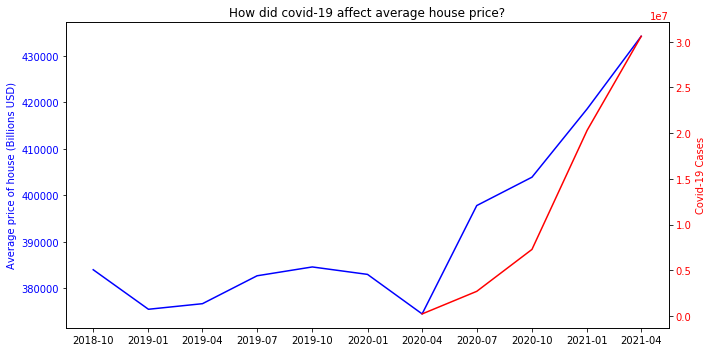

In [213]:
fig,ax1 = plt.subplots(figsize=(10,5))
ax1.plot(price_df["avg_price"], color="blue")
ax1.set_ylabel("Average price of house (Billions USD)", color='blue')
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()

ax2.plot(price_df["Total confirmed cases of COVID-19"], color='r')
ax2.set_ylabel("Covid-19 Cases", color='r')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlabel("Date")

ax2.set_title("How did covid-19 affect average house price?")

fig.tight_layout()  
plt.show()

In [81]:
price_df1 = price_df.dropna()
coef, p_val = stats.pearsonr(price_df1["avg_price"], price_df1["Total confirmed cases of COVID-19"])
print("Pearson's correlation coefficient: {0:.2f}".format(coef))

Pearson's correlation coefficient: 0.94


- House prices were stagnant until covid hit
- Strong correlation with average price of house vs cases

In [215]:
pce_df = pd.read_csv("data/Personal_Consumption_Expenditures.csv", parse_dates=True, index_col="DATE")
pce_df.head()

PCE
DATE               
2018-09-01  14030.7
2018-10-01  14119.6
2018-11-01  14187.8
2018-12-01  14050.6
2019-01-01  14104.4

In [232]:
pce_cases_df = pce_df.join(cases_df[["Total confirmed cases of COVID-19"]])
normalized_df = (pce_cases_df - pce_cases_df.min()) / (pce_cases_df.max() - pce_cases_df.min())

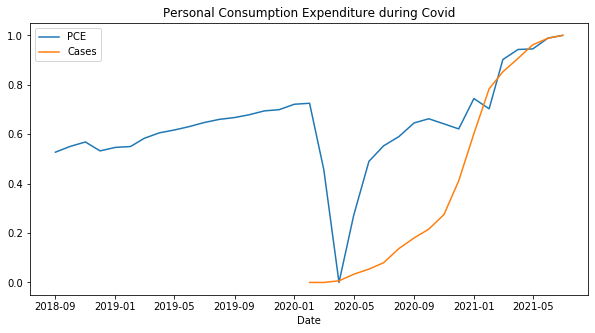

In [233]:
fig = plt.figure(figsize=(10,5))
plt.plot(normalized_df["PCE"], label="PCE")
plt.plot(normalized_df["Total confirmed cases of COVID-19"], label="Cases")
plt.title("Personal Consumption Expenditure during Covid")
plt.xlabel("Date")
plt.legend(loc="best")
plt.show()

In [218]:
normalized_df = normalized_df.dropna()
coef, p_val = stats.pearsonr(normalized_df["PCE"], normalized_df["Total confirmed cases of COVID-19"])
print("Pearson's correlation coefficient: {0:.2f}".format(coef))

Pearson's correlation coefficient: 0.82


- Difficult to see the impact of covid cases because it is cumulative data
- Big drop in blue line is because of lockdown
- Increase/decrease is shown in the gradient of the cases

## Consumer sentiment


In [126]:
sent = pd.read_csv("data/Change_in_Home_Values_During_the_Past_Year.csv", parse_dates=True, index_col='Date')
sent.head()

Increase  Same  Decrease  DK; NA  Median  Mean  Variance  \
Date                                                                   
2007-05-31      37.0  50.0      13.0     0.0     0.2   1.5      46.0   
2007-04-30      34.0  52.0      13.0     1.0     0.2   1.5      41.0   
2007-03-31      41.0  46.0      12.0     1.0     0.3   2.5      43.0   
2007-02-28      35.0  55.0       8.0     2.0     0.0   2.2      51.0   
2007-01-31      41.0  49.0       9.0     1.0     0.3   2.3      50.0   

            25th Percentile  75th Percentile  Interquartile Rang (75th-25th)  
Date                                                                          
2007-05-31             -0.3              4.7                             5.0  
2007-04-30             -0.3              3.8                             4.1  
2007-03-31             -0.2              4.9                             5.1  
2007-02-28             -0.9              4.7                             5.6  
2007-01-31             -0.2              4.7                             4.9

In [234]:
index = pd.read_csv("data/All_Transactions_House_Price_Index.csv", parse_dates = True, index_col = 'DATE')
index.columns = ['Price_index']
index.head()

Price_index
DATE                   
2018-10-01       424.89
2019-01-01       429.57
2019-04-01       436.69
2019-07-01       442.23
2019-10-01       446.22

In [134]:
sent.index += pd.Timedelta(days = 1)
sent = sent.join(index)
sent = sent.dropna()
sent = sent[['Increase','Same','Decrease','Price_index']]
sent = sent.sort_index()

Increase  Same  Decrease  Price_index
Date                                             
2018-10-01      49.0  41.0       9.0       424.89
2019-01-01      49.0  41.0      10.0       429.57
2019-04-01      51.0  42.0       6.0       436.69
2019-07-01      53.0  39.0       8.0       442.23
2019-10-01      49.0  39.0      12.0       446.22

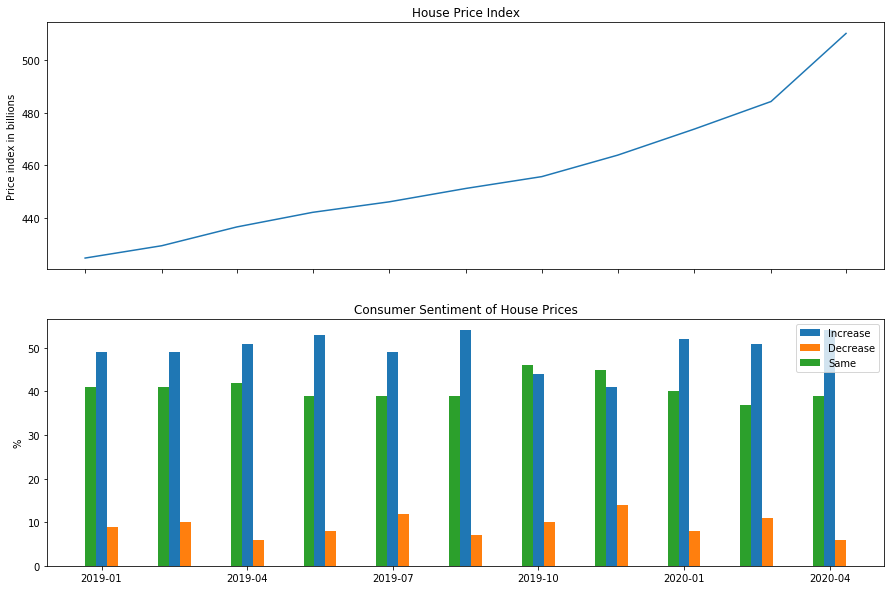

In [209]:
xticks = [str(a)[:7] for a in sent.index]

x = np.arange(len(sent.index))  # the label locations
width = 0.15 # the width of the bars

x1 = np.arange(len(sent.index))
x2 = [x + width for x in x1]
x3 = [x - width for x in x1]

fig, (ax1, ax2) = plt.subplots(2,figsize = (15,10))
rects1 = ax2.bar(x1 , sent['Increase'], width, label='Increase')
rects2 = ax2.bar(x2 , sent['Decrease'], width, label='Decrease')
rects3 = ax2.bar(x3, sent['Same'], width, label='Same')

ax2.set_xticklabels(xticks)
ax2.set_ylabel('%')
ax2.set_title('Consumer Sentiment of House Prices')
ax1.set_title('House Price Index')
ax1.set_ylabel('Price index in billions')
ax1.set_xticklabels([])

ax2.legend()

ax1.plot(sent['Price_index'])

plt.show()

- Consumer sentiment is right
- Not much skepticism in the market

## MBS

In [63]:
mbs_df = pd.read_csv("data/Treasury_and_agency_securities_MBS.csv", parse_dates=True, index_col="DATE")
mbs_df.columns = ["mbs"]
pd.concat([mbs_df.head(), mbs_df.tail()])

mbs
DATE                 
2018-09-05  1822.8371
2018-09-12  1827.2951
2018-09-19  1828.1877
2018-09-26  1829.4341
2018-10-03  1826.7462

In [118]:
loan_df = pd.read_csv("data/real_estate_loans.csv", parse_dates=True, index_col="DATE")
loan_df.columns=["loan_value"]
pd.concat([loan_df.head(), loan_df.tail()])

loan_value
DATE                  
2018-12-05    350.1752
2018-12-12    349.6732
2018-12-19    349.3702
2018-12-26    348.4136
2019-01-02    351.4002
2021-08-18    255.9735
2021-08-25    255.3672
2021-09-01    254.7820
2021-09-08    254.3528
2021-09-15    253.8716

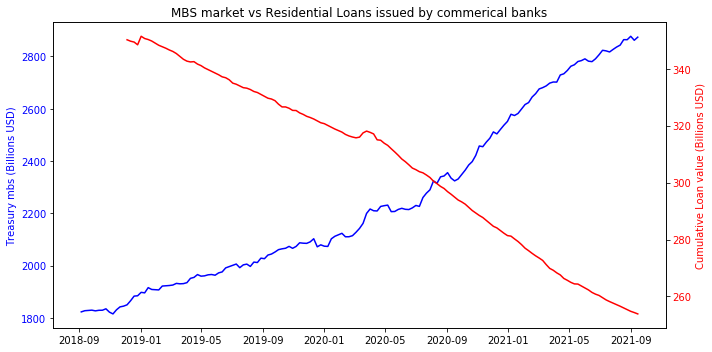

In [212]:
fig,ax1 = plt.subplots(figsize=(10,5))
ax1.plot(mbs_df["mbs"], color="blue")
ax1.set_ylabel("Treasury mbs (Billions USD)", color='blue')
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(loan_df["loan_value"], color='r')
ax2.set_ylabel("Cumulative Loan value (Billions USD)", color='r')
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("MBS market vs Residential Loans issued by commerical banks")

fig.tight_layout()  
plt.show()

- Expect cumulative loan value issued by commercial banks to correlate with treasury MBS
- Shows the MBS market isn't driven by it
- Goldman Sachs research says that MBS market should increase given there is more QE